<a href="https://colab.research.google.com/github/rifka1/MSIBOrbit/blob/main/MINI_PROJECT_CV_KELOMPOK_SACRIFICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IDENTIFIKASI KEMATANGAN PADA BUAH SAWIT**
**KELOMPOK SACRIFICE**
1. Boy Fransiskus Sitanggang
2. Dimas Danu Saputra
3. Ghina Alyaa Nabillah
4. Presillia Br Sianturi
5. Rifka Fariyanti
6. Tyas Ismayanti

Link PPT AI Projek Cycle:<br>
https://docs.google.com/presentation/d/1wsy2WBrGNBEs4k6iBLyg1Hi8BlhXwdm9KB8tTaOpRro/edit?usp=sharing

<br>
Dalam PPT berisi mengenai latar belakang, problem scooping, data acquisition, data exploration, hingga modelling.
<br>

Link Google Drive Dataset : https://drive.google.com/drive/folders/1-d_tV5TEn5EPQr6YQOyuptOyOBot_D49?usp=sharing

#MODELLING

In [ ]:
from google.colab import drive
import os
import zipfile

local_zip = '/content/drive/MyDrive/Dataset Mini Project/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/train_data')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/MyDrive/Dataset Mini Project/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/valid_data')
zip_ref.close()

**Menentukan setiap subdirectory :**

In [ ]:
# Directory with our training ripe palm pictures
train_matang_dir = os.path.join('/content/train_data/Matang') 

# Directory with our training raw palm pictures
train_mentah_dir = os.path.join('/content/train_data/Mentah')
# Directory with our validation ripe palm pictures
valid_matang_dir = os.path.join('/content/valid_data/Matang')

# Directory with our validation raw palm pictures
valid_mentah_dir = os.path.join('/content/valid_data/Mentah')

**Melihat seperti apa nama file di training directory buah sawit matang dan mentah :**

In [ ]:
train_matang_names = os.listdir(train_matang_dir)
print(train_matang_names[:10])

train_mentah_names = os.listdir(train_mentah_dir)
print(train_mentah_names[:10])

validation_matang_hames = os.listdir(valid_matang_dir)
print(validation_matang_hames[:10])

validation_mentah_names = os.listdir(valid_mentah_dir)
print(validation_mentah_names[:10])

['Matang190.jpg', 'Matang006.jpg', 'Matang034.jpg', 'Matang078.jpg', 'Matang026.jpg', 'Matang185.jpg', 'Matang127.jpg', 'Matang096.jpg', 'Matang180.jpg', 'Matang125.jpg']
['Mentah246.jpg', 'Mentah047.jpg', 'Mentah219.jpg', 'Mentah073.jpg', 'Mentah012.jpg', 'Mentah153.jpg', 'Mentah132.jpg', 'Mentah024.jpg', 'Mentah242.jpg', 'Mentah063.jpg']
['69.jpg', '52.jpg', '26.jpg', '61.jpg', '40.jpg', '29.jpg', '15.jpg', '56.jpg', '9.jpg', '63.jpg']
['69.jpg', '72.jpg', '52.jpg', '26.jpg', '61.jpg', '40.jpg', '29.jpg', '15.jpg', '56.jpg', '9.jpg']


**Mencari informasi berapa total images dari dandelion dan rumput di directory :**

In [ ]:
print('total training sawit matang images:', len(os.listdir(train_matang_dir)))
print('total training sawit mentah images:', len(os.listdir(train_mentah_dir)))
print('total validation sawit matang images:', len(os.listdir(valid_matang_dir)))
print('total validation sawit mentah images:', len(os.listdir(valid_mentah_dir)))

total training sawit matang images: 202
total training sawit mentah images: 250
total validation sawit matang images: 70
total validation sawit mentah images: 75


**Melihat beberapa pictures untuk mendapatkan sense lebih baik Seperti apa. Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters:**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

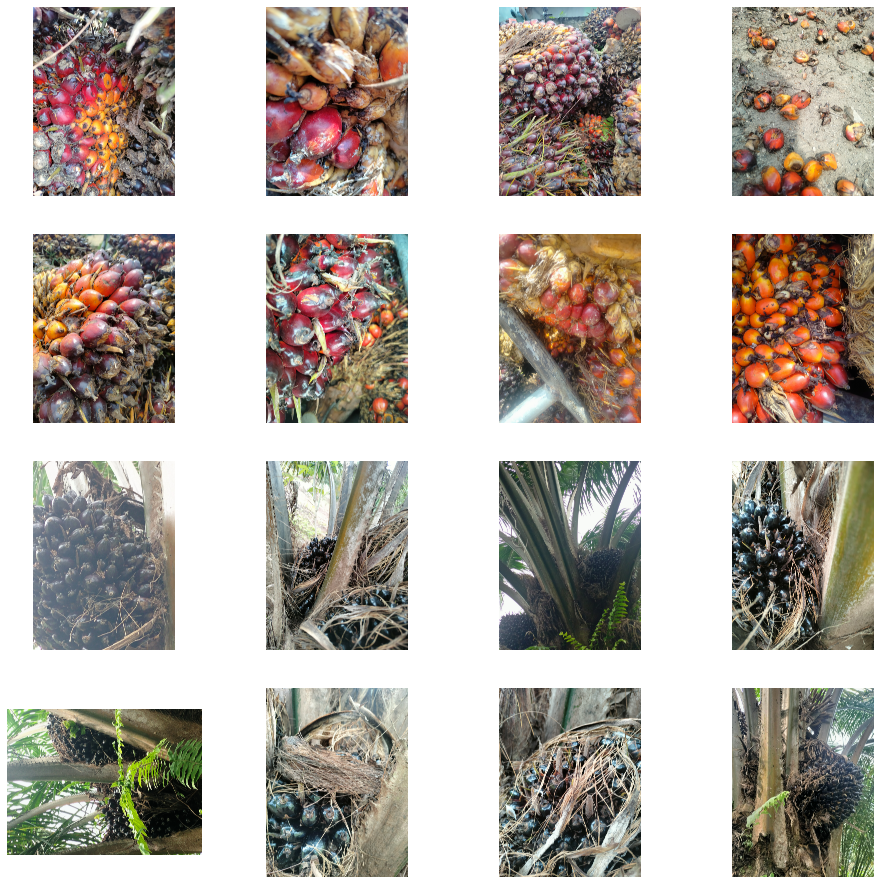

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_matang_pic = [os.path.join(train_matang_dir, fname) 
                for fname in train_matang_names[pic_index-8:pic_index]]
next_mentah_pic = [os.path.join(train_mentah_dir, fname) 
                for fname in train_mentah_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_matang_pic + next_mentah_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train_data',  # This is the source directory for training images
        classes = ['Matang', 'Mentah'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/valid_data',  # This is the source directory for training images
        classes = ['Matang', 'Mentah'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 452 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


# **Building the Model from Scratch**

**Memulai menentukan model:**

In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# Conv Layer pertama
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2,2))

# Conv Layer kedua
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer keempat
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer kelima
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten()) #membuat ukuran 1 Dimensi, misal 8*8 menjadi 1*64

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

**MENDIFINISKAN MODEL**

**COMPILE MODEL**

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

**FITTING MODEL**

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=4,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/5
4/4 [==============================] - 146s 36s/step - loss: 0.3599 - accuracy: 0.8872 - val_loss: 0.2342 - val_accuracy: 0.9211
Epoch 2/5
4/4 [==============================] - 144s 38s/step - loss: 0.4764 - accuracy: 0.7965 - val_loss: 0.1656 - val_accuracy: 0.9474
Epoch 3/5
4/4 [==============================] - 144s 38s/step - loss: 0.2816 - accuracy: 0.8628 - val_loss: 0.2747 - val_accuracy: 0.9079
Epoch 4/5
4/4 [==============================] - 145s 36s/step - loss: 0.2528 - accuracy: 0.9071 - val_loss: 0.1882 - val_accuracy: 0.9342
Epoch 5/5
4/4 [==============================] - 145s 35s/step - loss: 0.1631 - accuracy: 0.9558 - val_loss: 0.1823 - val_accuracy: 0.9342


**Evaluasi accuracy model:**

In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 19s 3s/step - loss: 0.3028 - accuracy: 0.8966


[0.3027649521827698, 0.8965517282485962]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

8/8 [==============================] - 19s 3s/step


**Untuk membuat ROC curve dan AUC, kita harus menghitung false-positive rate dan true-positive rate:**

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

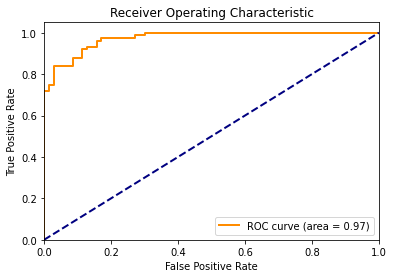

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('model_kematangan_sawit.h5')

# **PREDIKSI**

Saving 14.jpg to 14.jpg
[1.]
14.jpg ini adalah buah sawit yang belum matang


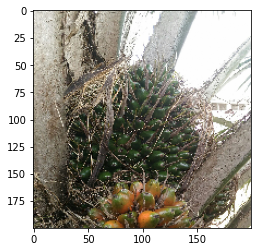

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " ini adalah buah sawit yang sudah matang")
  else:
    print(fn + " ini adalah buah sawit yang belum matang")